In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import  matplotlib as mpl


In [2]:
#scer annotations from http://www.saccharomycessensustricto.org/current/Scer/Scer.gff

gff = '/Users/clairedubin/sacc/carly_genes/Scer.gff.txt'

annotation_dict = {}

for line in open(gff, 'r').readlines():
    
    if 'CDS' not in line:
        
        continue
        
    gene = line.split('SGD=')[1].split(';')[0]
    chrom, start, stop, direction = line.split('\t')[0], line.split('\t')[3], line.split('\t')[4], line.split('\t')[6]
    
    annotation_dict[gene] = [int(chrom), int(start), int(stop), direction]
    
annotation_dict
    

{'YAL069W': [5, 569954, 570016, '-'],
 'YAL068W-A': [1, 652, 789, '+'],
 'YGL261C': [7, 6290, 6652, '-'],
 'YOR394W': [16, 7933, 8427, '-'],
 'YBL108W': [2, 8177, 8482, '+'],
 'YAL067W-A': [1, 2495, 2704, '+'],
 'YML132W': [12, 1061667, 1061783, '+'],
 'YFL062W': [14, 8330, 9475, '+'],
 'YAL067C': [1, 7235, 9016, '-'],
 'YAL066W': [1, 10091, 10399, '+'],
 'YAL063C': [1, 203403, 208016, '+'],
 'YAL064W-B': [1, 12046, 12426, '+'],
 'YFR015C': [12, 660716, 662833, '+'],
 'YAL064C-A': [1, 13363, 13743, '-'],
 'YAR050W': [8, 538939, 539121, '+'],
 'YAR061W': [1, 13953, 13991, '-'],
 'YHR212W-A': [8, 538742, 538933, '+'],
 'YAR060C': [8, 537759, 538094, '-'],
 'YMR316W': [13, 904825, 905835, '+'],
 'YAR062W': [8, 539151, 539747, '+'],
 'YAL064W': [8, 530762, 531078, '-'],
 'YAL063C-A': [1, 22395, 22685, '-'],
 'YAR053W': [8, 528972, 529130, '+'],
 'YOR375C': [1, 31567, 32940, '+'],
 'YAL061W': [1, 33448, 34701, '+'],
 'YAL060W': [10, 731460, 731729, '-'],
 'YAL059W': [1, 36509, 37147, '+'],


In [3]:
#parsing function from melanie
def ParseG1(g1_file):
    '''
    Input: outfile from sweepfinder 2
    Output: 
    '''
    pos_list=[]
    G1_list=[]
    ratioG2G1_list=[]
    g_dict = {}
        
    #add position and values for each base to a dictionary for that chromosome
    f = open(g1_file)
    next(f)
    for line in f:
        row_data = line.strip().split("\t")
        peak_ctr=int(row_data[0])
#         pos_list.append(peak_ctr)
#         G1_list.append(float(row_data[6]))
#         ratioG2G1_list.append(float(row_data[9]))
        #columns:
            #1ctrcoord (index 0)
            #2leftcoord
            #3rightcoord
            #4K
            #55hapfreqspec
            #6strainnum
            #7H1 (index 6)
            #8H2 (index 7)
            #9H12 (index 8)
            #10H2/H1 (index 9)
            #11G13 (index 10)
        g_dict[peak_ctr] = float(row_data[6])
 
    f.close()
#     return pos_list, G1_list, ratioG2G1_list
    return g_dict

In [5]:
all_g1 = {}
for chrom in range(1,17):
    all_g1[chrom] = ParseG1('/Users/clairedubin/sacc/carly_genes/G1_data/1WineEuropean_G1/merged_1WineEuropean_chromosome{}.h12_h2h1'.format(str(chrom)))
    
all_g1

{1: {34444: 0.0208174353652,
  34581: 0.0199169744513,
  34690: 0.0199780226489,
  34756: 0.0200390708464,
  34820: 0.0197796160068,
  34929: 0.0173987363023,
  35035: 0.0170019230182,
  35148: 0.0170019230182,
  35336: 0.0167882543268,
  35469: 0.01620829645,
  35574: 0.0161777723513,
  35751: 0.016483013339,
  35931: 0.0165287994872,
  36123: 0.0229693843289,
  36233: 0.024388754922,
  36369: 0.0259454839596,
  36523: 0.0259454839596,
  36616: 0.0264643936388,
  36746: 0.0280516467751,
  36940: 0.0286010805531,
  37089: 0.0304020023809,
  37243: 0.030722505418,
  37368: 0.032767620036,
  37500: 0.0320045175666,
  37596: 0.0318976832209,
  37788: 0.0433136961631,
  37905: 0.0434815787064,
  38072: 0.0438173437929,
  38208: 0.0447025426574,
  38351: 0.0441683709288,
  38503: 0.072891547877,
  38648: 0.0557217423156,
  38822: 0.0556454320686,
  38972: 0.0568053478221,
  39056: 0.0568053478221,
  39175: 0.0602087848356,
  39300: 0.0545007783645,
  39446: 0.0531729800678,
  39596: 0.06225

In [6]:
df = pd.DataFrame.from_dict(all_g1)

In [7]:
for i in all_g1:
    if i==1:
        df = pd.DataFrame.from_dict(all_g1[i], orient='index', columns=['G1'])
        df['chrom'] = [i for _ in all_g1[i].keys()]
    else:
        temp = pd.DataFrame.from_dict(all_g1[i], orient='index', columns=['G1'])
        temp['chrom'] = [i for _ in all_g1[i].keys()]
        df = df.append(temp)

In [8]:
df = df.reset_index().rename(columns={'index':'pos'})
df

,pos,G1,chrom
0,34444,0.020817,1
1,34581,0.019917,1
2,34690,0.019978,1
3,34756,0.020039,1
4,34820,0.019780,1
...,...,...,...
57834,555903,0.053173,16
57835,555982,0.061964,16
57836,556030,0.060758,16
57837,556097,0.062208,16


In [9]:
# merge with pi data

pi = pd.read_csv('/Users/clairedubin/sacc/carly_genes/population_vcfs/1WineEuropean.sites.pi', sep='\t')
pi['chrom'] = pi['CHROM'].str.replace('chromosome','').astype(int)
pi = pi.drop(columns='CHROM').rename(columns={'POS':'pos','PI':'pi'})
pi = pi[pi['pi']>0.0] # pi = 0 means its not actually a snp
pi

,pos,pi,chrom
18,210,0.067756,1
20,237,0.061508,1
25,264,0.012539,1
27,270,0.101959,1
29,275,0.108875,1
...,...,...,...
1544463,945944,0.200000,16
1544469,946418,0.036030,16
1544471,946477,0.013699,16
1544474,946580,0.087774,16


In [10]:
df.shape, pi.shape

((57839, 3), (262683, 3))

In [11]:
merged = df.merge(pi, how='left', on=['chrom','pos'])
merged.head()

,pos,G1,chrom,pi
0,34444,0.020817,1,NaN
1,34581,0.019917,1,NaN
2,34690,0.019978,1,NaN
3,34756,0.020039,1,NaN
4,34820,0.019780,1,NaN


In [12]:
#calculate pi in sliding windows
window_pi = []

pi_sum = []

pi_window_size = []

for chrom in range(1,17):
    temp = merged[merged['chrom'] == chrom].reset_index()
    
    for snp in temp.index:
        
        
        if snp < 600 or snp > temp.shape[0]-600:
            
            window = temp.loc[max(snp-600,0):min(snp+600,temp.shape[0])]
            
        else:
            
            window = temp.loc[snp-600:snp+600]
        
        pi_sum += [window['pi'].sum()]
        
        pi_window_size += [(window['pos'].max()-window['pos'].min())]

        
merged['pi_sum'] = pi_sum
merged['pi_window_size'] = pi_window_size
merged['pi_window'] = merged['pi_sum']/ merged['pi_window_size']

In [13]:
merged.head()

,pos,G1,chrom,pi,pi_sum,pi_window_size,pi_window
0,34444,0.020817,1,NaN,1.285154,105615,0.000012
1,34581,0.019917,1,NaN,1.285154,106553,0.000012
2,34690,0.019978,1,NaN,1.285154,106784,0.000012
3,34756,0.020039,1,NaN,1.285154,107005,0.000012
4,34820,0.019780,1,NaN,1.285154,107085,0.000012


<Figure size 1080x3600 with 0 Axes>

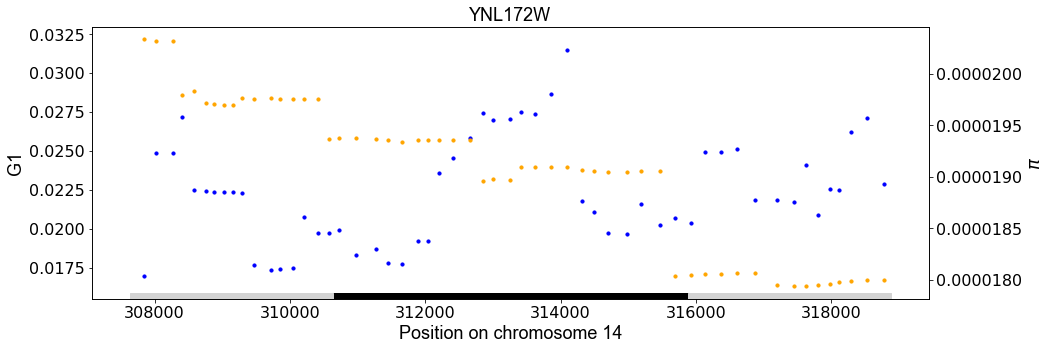

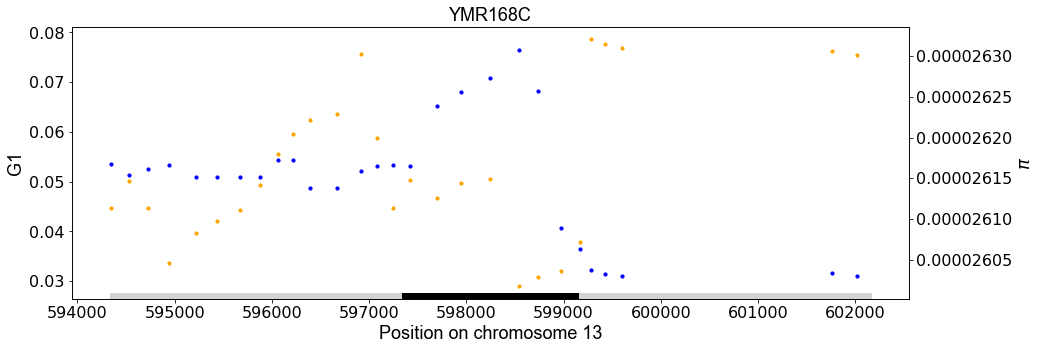

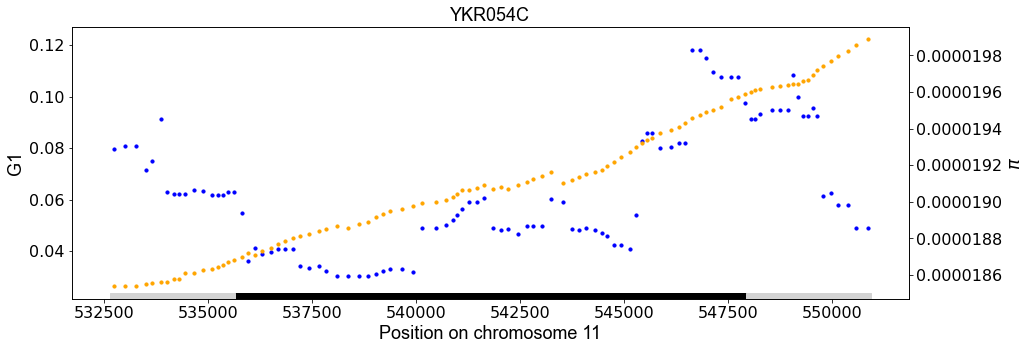

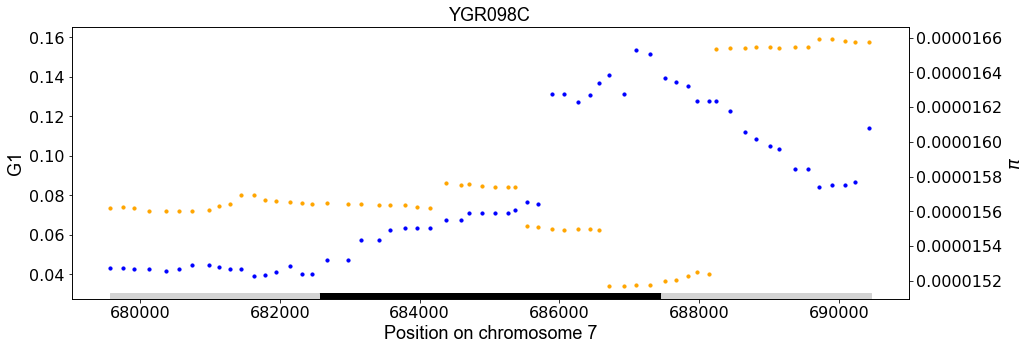

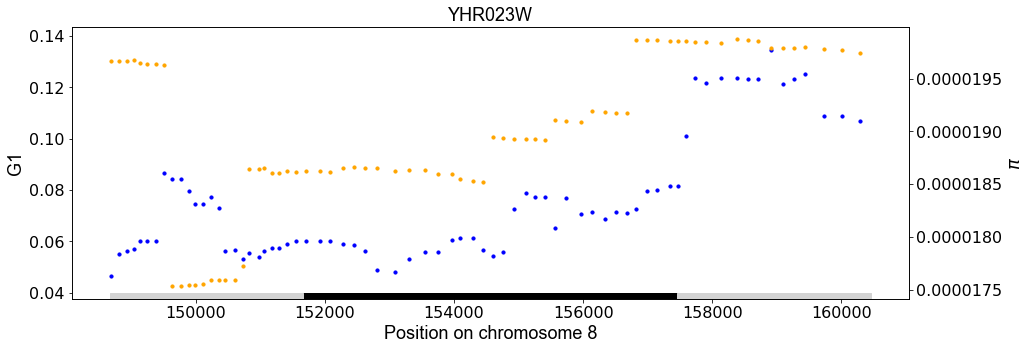

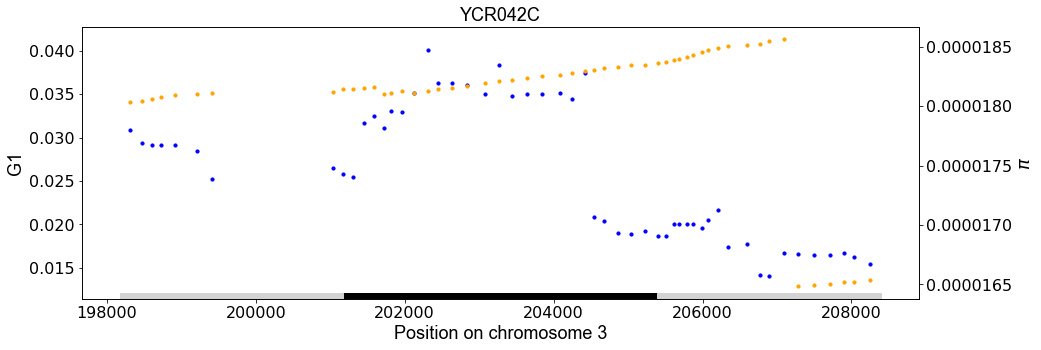

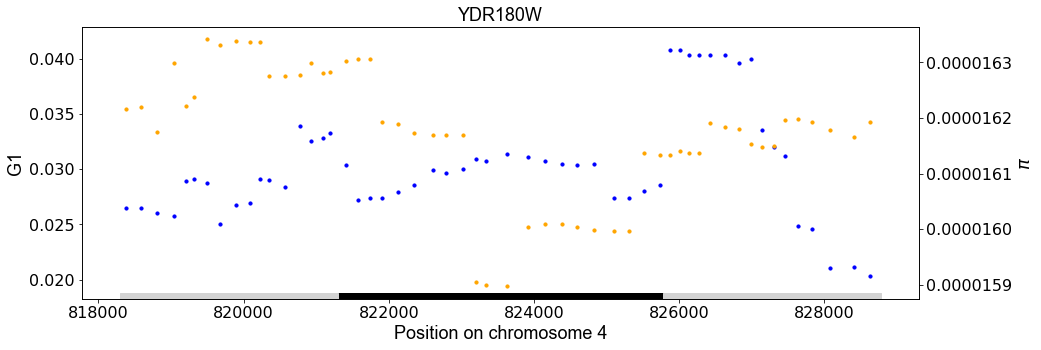

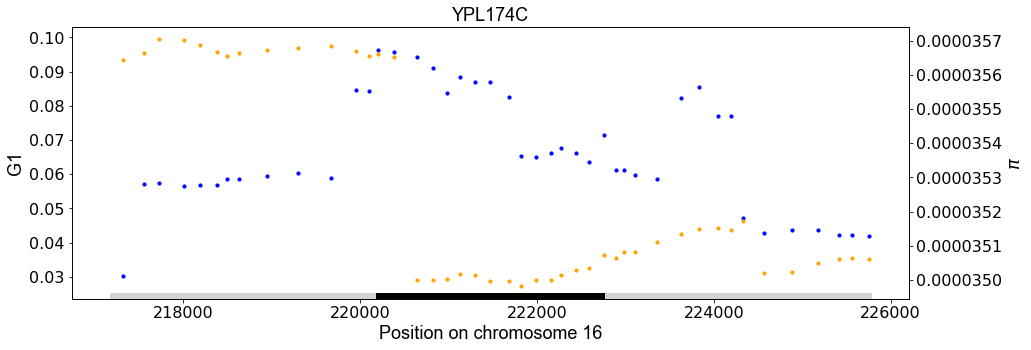

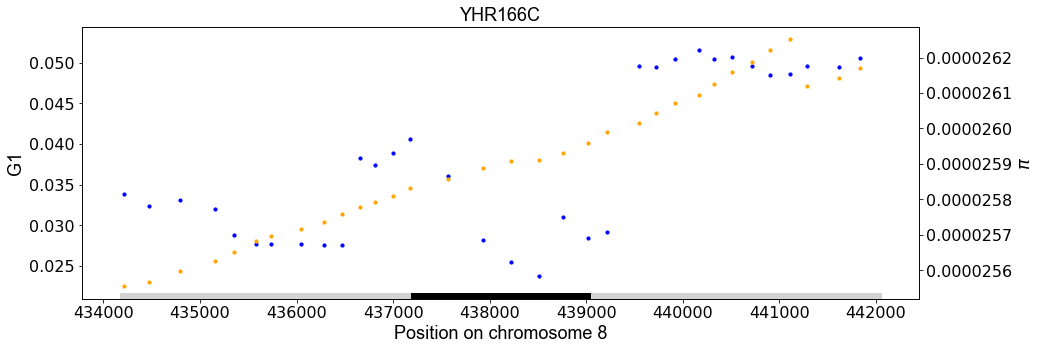

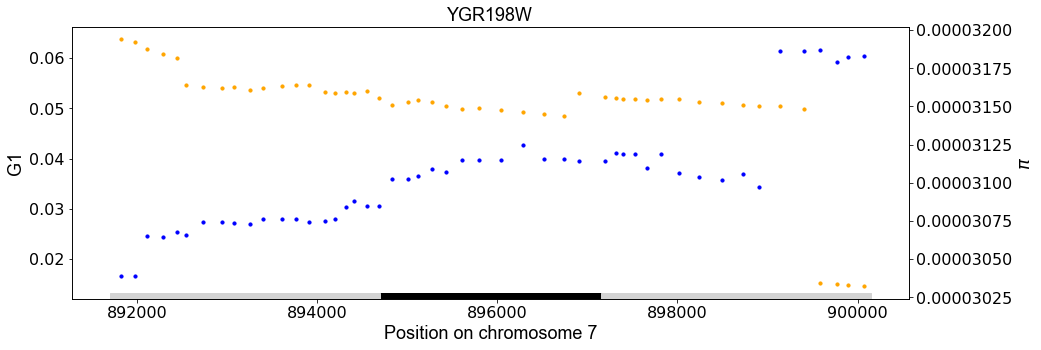

In [28]:
#graphs for just ORFS

melanie_genes =   ['YNL172W', 'YMR168C', 'YKR054C', 'YGR098C', 'YHR023W', 'YCR042C', 'YDR180W']+ ['YPL174C', 'YHR166C', 'YGR198W']


fig = plt.figure(figsize=(15, 50))
fig.subplots_adjust(hspace=0.8, wspace=0.4)

for _, gene in enumerate(melanie_genes):
    
    fig = plt.figure(figsize=(15, 5))
    
    chrom, start, stop, direction = annotation_dict[gene]
    
    locs = merged[(merged['chrom']==int(chrom)) & merged['pos'].isin(range(int(start)-3000,int(stop)+3000))]
    locs = locs[locs['G1'] > 0]
    
    ax = fig.subplots()
    ax.scatter(locs['pos'].astype(int),locs['G1'],color='blue',s=10)
    ax.set_xlabel('Position on chromosome '+str(chrom), fontname="Arial", fontsize=18)
    ax.set_ylabel('G1', fontname="Arial", fontsize=18)
    ax.tick_params(axis='both', which='major', labelsize=16)

    padding = (locs['G1'].max()-locs['G1'].min())/10

    ax.set_ylim(locs['G1'].min()-padding, locs['G1'].max()+padding)

    #ORF bar plotting
    height = padding/4

    orf = mpl.patches.Rectangle((start, locs['G1'].min()-padding), 
                                     stop-start, height, color ='black')        

    right = mpl.patches.Rectangle((stop,locs['G1'].min()-padding), 
                                     3000, height, color ='lightgray')
    left = mpl.patches.Rectangle((start-3000, locs['G1'].min()-padding), 
                                     3000, height, color ='lightgray')       
    ax.add_patch(orf)
    ax.add_patch(right)
    ax.add_patch(left)

    ax2=ax.twinx()
    ax2.scatter(locs['pos'].astype(int),locs['pi_window'],color='orange',s=10)
    ax2.ticklabel_format(style='plain')
    ax2.tick_params(axis='y', which='major', labelsize=16)

    ax2.set_ylabel(r'$\pi$',fontname="Arial", fontsize=18)
    
    plt.title(gene, fontname="Arial", fontsize=18)
    
    fig.savefig('/Users/clairedubin/Desktop/{}_piwindows_and_g1_plot.png'.format(gene),format='png',dpi=600)


In [29]:
#for when i add arrows manually in preview

for _, gene in enumerate(melanie_genes):
        
    chrom, start, stop, direction = annotation_dict[gene]
    
    print(gene, direction)

YNL172W +
YMR168C -
YKR054C -
YGR098C -
YHR023W +
YCR042C -
YDR180W +
YPL174C -
YHR166C -
YGR198W +
